In [1]:
import pandas as pd 
import numpy as np
import os 
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\ryani\Desktop\JupyterLab\NY_Citibike_2022"

In [3]:
df = pd.read_pickle(os.path.join(path, '02_Prepared_Data', 'merged_profile.pkl'))
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,Precipitation,avgtemp,trips_per_day,tripduration,tripduration(mins),usertype
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,-6.0,33598,528,9,member_electric_bike
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,1.6,34727,649,11,member_classic_bike
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,-2.3,42005,832,14,member_electric_bike
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,1.4,33189,2102,35,member_classic_bike
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,-5.9,31969,1234,21,member_classic_bike


In [5]:
df['value'] = 1
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [6]:
top20 = df_t.nlargest(20, 'value')
top20

,start_station_name,value
1587,W 21 St & 6 Ave,129016
1718,West St & Chambers St,123289
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106440
8,1 Ave & E 68 St,104856
461,Broadway & E 14 St,98862
485,Broadway & W 25 St,98422
1511,University Pl & E 14 St,97120
463,Broadway & E 21 St,95691
1603,W 31 St & 7 Ave,94208


# Create a bar chart of the top 20 starting stations frequencies. Does the color palette you chose when you set the theme in the previous step make sense in this plot? If not, change the style of this specific plot temporarily. Hint: Does the default setting of the palette contain enough colors?

C:\Users\ryani\AppData\Local\Temp\ipykernel_24376\1887388591.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x= 'value', y= 'start_station_name', palette = ('dark:#5A9'))


Text(0.5, 0, 'Count')

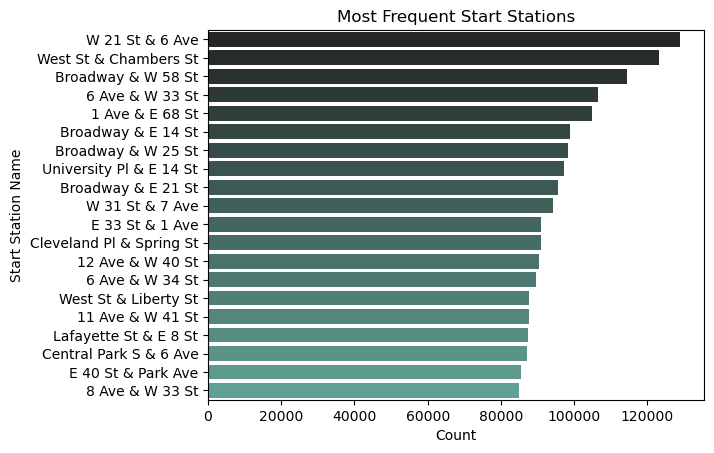

In [16]:
sns.barplot(data = top20, x= 'value', y= 'start_station_name', palette = ('dark:#5A9'))
plt.title('Most Frequent Start Stations')
plt.ylabel('Start Station Name')
plt.xlabel('Count')

## Yes, it makes sense. 20 colours would be too busy.

# Recreate the dual-axis line plot from the previous Exercise using seaborn

In [21]:
df_day = (df.groupby('date', as_index=True).agg(trips_per_day=('ride_id', 'count'),avgtemp=('avgtemp', 'mean')))
df_day.shape

(365, 2)

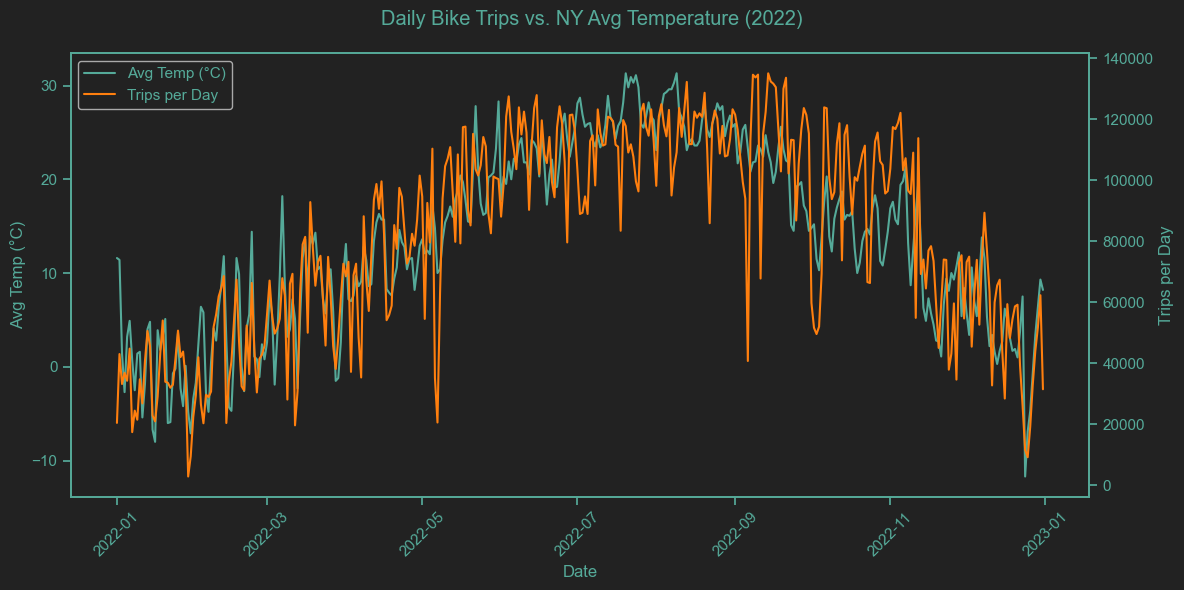

In [25]:
# Define a dark theme with #5A9 accents
sns.set_theme(
    style="ticks",
    rc={
        "figure.facecolor": "#222222",
        "axes.facecolor":   "#222222",
        "grid.color":       "#333333",
        "grid.linestyle":   "--",
        "axes.edgecolor":   "#5A9",
        "xtick.color":      "#5A9",
        "ytick.color":      "#5A9",
        "axes.labelcolor":  "#5A9",
        "text.color":       "#5A9",})

# Create figure and primary axis for Avg Temp
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(
    df_day.index,
    df_day["avgtemp"],
    color="#5A9",
    linewidth=1.5,
    label="Avg Temp (°C)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Avg Temp (°C)")
ax1.tick_params(axis="x", rotation=45)

# Twin axis for Trips per Day
ax2 = ax1.twinx()
ax2.plot(
    df_day.index,
    df_day["trips_per_day"],
    color="tab:orange",
    linewidth=1.5,
    label="Trips per Day")
ax2.set_ylabel("Trips per Day")

# Merge legends
lines, labels = (
    ax1.get_lines() + ax2.get_lines(),
    [l.get_label() for l in ax1.get_lines() + ax2.get_lines()])
ax1.legend(lines, labels, loc="upper left")

# Title and layout
fig.suptitle("Daily Bike Trips vs. NY Avg Temperature (2022)", color="#5A9")
fig.tight_layout()
plt.show()

# Make a box plot of one of the categorical variables in your data set. What does this plot tell you about the variable? Write down a 3 to 5-sentence analysis of the elements of the box plot.

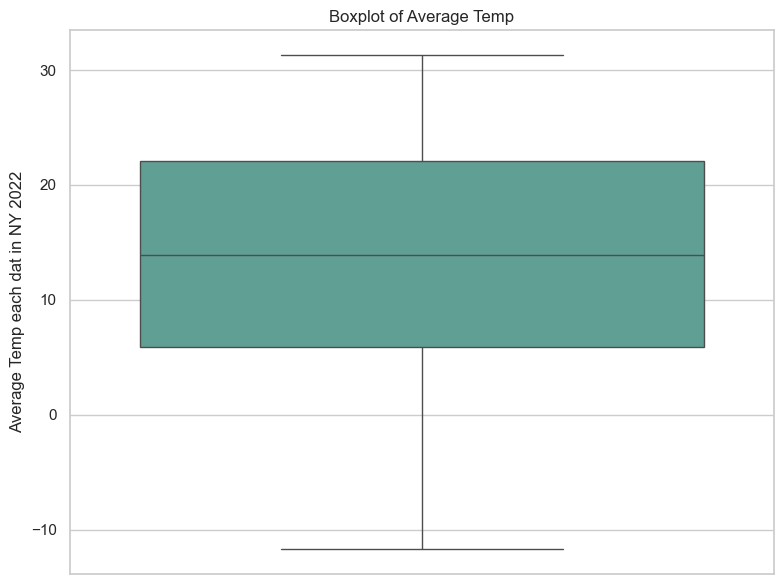

In [31]:
# Set up a whitegrid background and single‐color palette
sns.set_theme(style='whitegrid')
sns.set_palette(['#5A9'])

td = df_day['avgtemp']

# Create figure and axis, name the figure for export
fig_temp_box_tut, ax = plt.subplots(figsize=(8, 6))

# Draw the boxplot
sns.boxplot(
    y=td,
    ax=ax,
    color='#5A9')

# Customize labels and title
ax.set_title('Boxplot of Average Temp')
ax.set_ylabel('Average Temp each dat in NY 2022')

plt.tight_layout()
plt.show()

## The middle line is at around 13 degrees, indicating that the median temperature in 2022 was about 13 degrees Celcius. The bottom of the box represents the first quartile (Q1), and the top represents the third quartile (Q3) which are at around 8 and 22 degree C approximately. The error bars go from -11 to 32 degrees approximately which mean they are outside the Q1-Q3 zone but not considered outliers. There are no points outside the box and whisker meaning we do not have any true outliers here. 

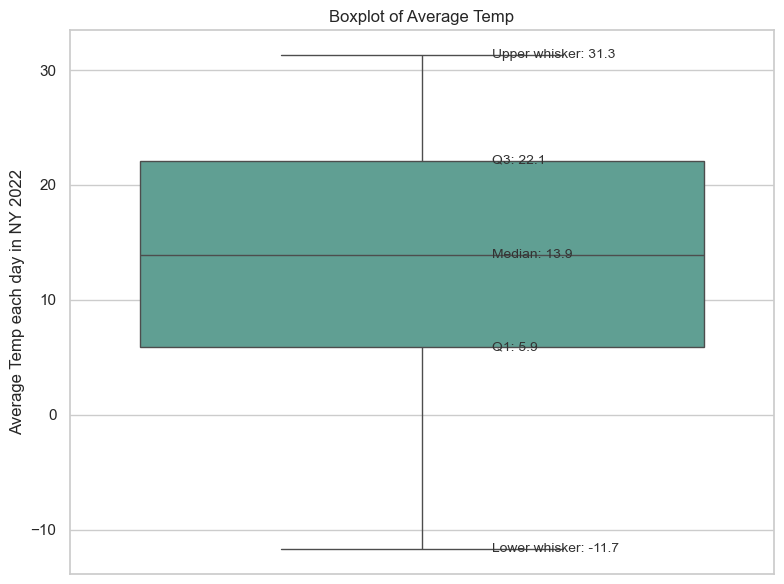

In [32]:
# 1. Set up styling
sns.set_theme(style='whitegrid')
sns.set_palette(['#5A9'])

# 2. Extract the data
td = df_day['avgtemp']

# 3. Compute box‐plot statistics
q1, median, q3 = np.percentile(td, [25, 50, 75])
iqr = q3 - q1
lower_whisk = td[td >= (q1 - 1.5 * iqr)].min()
upper_whisk = td[td <= (q3 + 1.5 * iqr)].max()

# 4. Draw the boxplot
fig_temp_box, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(y=td, ax=ax, color='#5A9')

# 5. Annotate Q1, median, Q3, and whiskers
x_pos = ax.get_xticks()[0]      # position of the single box on the x-axis
x_offset = 0.1                  # horizontal offset for text

for value, label in [
    (q1,           'Q1'),
    (median,       'Median'),
    (q3,           'Q3'),
    (lower_whisk,  'Lower whisker'),
    (upper_whisk,  'Upper whisker')
]:
    ax.text(
        x_pos + x_offset,
        value,
        f'{label}: {value:.1f}',
        ha='left',
        va='center',
        fontsize=10,
        color='#333'
    )

# 6. Titles and labels
ax.set_title('Boxplot of Average Temp')
ax.set_ylabel('Average Temp each day in NY 2022')

plt.tight_layout()
plt.show()


In [33]:
# Export
fig_temp_box.savefig(os.path.join(path, '04_Visualisations', 'fig_temp_box.png'), dpi=300, bbox_inches='tight')

# Think of how the FacetGrid plot would make sense to aid the analysis questions in the project. Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings.

In [34]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'Precipitation', 'avgtemp', 'trips_per_day',
       'tripduration', 'tripduration(mins)', 'usertype', 'value'],
      dtype='object')

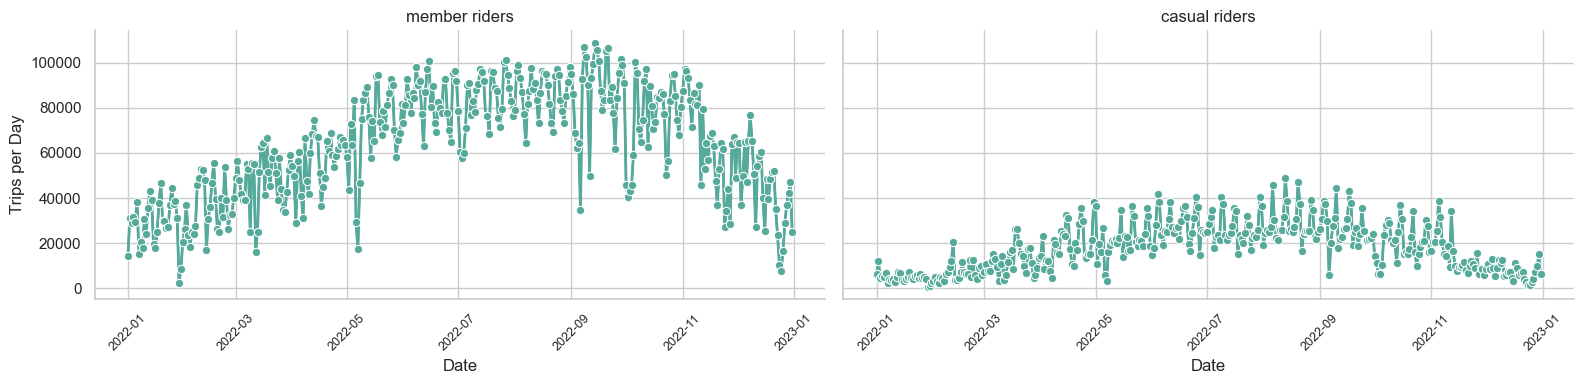

In [38]:
df_daily = (
    df
    .groupby(['date', 'member_casual'], as_index=False)
    .agg(trips_per_day=('ride_id', 'count'))
)

# 3. Set a clean Seaborn style
sns.set_theme(style='whitegrid', palette=['#5A9'])

# 4. Build the FacetGrid (one panel per member_casual)
g = sns.FacetGrid(
    df_daily,
    col='member_casual',
    col_order=['member', 'casual'],
    height=4,
    aspect=2
)

# 5. Map a lineplot of trips_per_day vs. date into each facet
g.map(
    sns.lineplot,
    'date',
    'trips_per_day',
    marker='o',
    color='tab:blue'
)

# 5. Map a lineplot with markers—all in your theme color
g.map_dataframe(
    sns.lineplot,
    x='date',
    y='trips_per_day',
    color='#5A9',
    marker='o',
    markersize=6,
    linewidth=2)

# 6. Label axes and titles
g.set_axis_labels('Date', 'Trips per Day')
g.set_titles(col_template='{col_name} riders')

# 7. Rotate x-axis labels for readability
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45, labelsize=9)

# 8. Tighten layout and capture the figure object
plt.tight_layout()
fig_trips_date_facet = g.fig

# 9. Display
plt.show()


In [39]:
# Export
fig_trips_date_facet.savefig(os.path.join(path, '04_Visualisations', 'fig_trips_date_facet'), dpi=300, bbox_inches='tight')

## This FacetGrid graph is very useful when I would like to compare two seperate groups against each other. While this particulat graph does not tell me much, it does tell me that there is the same trend of using the bike rental service between both member and non-members throughout the year. It also shows me that more rentals occur during Summer-Autumn.Both groups peak around July-August.